## Week 1 lab 1: Data tables and summary statistics

### General note 
Lab exercises in the first part of this unit ("Data Science") were designed on Python having the __pandas__, __numpy__, __matplotlib__ and __sklearn__ packages installed. It is possible that for some commands you need to have the latest version of these packages/libraries installed on your machine. 
Finally, it is likely that you are new to some of the packages/commands/objects/data structures used for solving the lab excersies. In this case it is recommended to search for the documentations of these on the corresponding package's (e.g. numpy, pandas etc) website to familiarise yourself with these commands. An nice introduction to the basics of using the above Python packages (in the form of Jupyter notebooks) are also included in this online, free book which is highly recommended to look if you're new to them: https://github.com/jakevdp/PythonDataScienceHandbook.

The unit tutors will also be available to provide help in the lab and also on the unit's online forum. 

__This lab__: During this exercise you will practice skills to basic data import and analysis using __pandas__ and __numpy__ packages. 


In [1]:
# Clean the workspace and screen
%clear
%reset
import matplotlib.pyplot as plt
plt.close('all')


Nothing done.


In [2]:
import pandas as pd
import numpy as np

## Loading table data

Load (read) the titanic.csv file into the Python's workspace. Python can read csv tables with the help of pandas. For this use pandas' ```read_csv``` command i.e. ```pd.read_csv('titanic.csv')```, to load data into a pandas' table object (here, the table is named T). 

In [4]:
T = pd.read_csv('titanic.csv')

Use pandas's ```head``` command to display the head of this dataset i.e. a few first rows of the table (you can specify the number of elements to see by passing an natural number as an argument). You should be able to see the variables each column represents alongside their values in each row (i.e., each sample/ passenger item).

In [7]:
T.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


## Accessing the table columns/rows

To access entries of each column you can either use their column index number or the column's name in the table. Assume you want to access the table's column about the journey outcome, i.e. the variable ```Survived```, and put it in a new variable ```y```. Then using the column name you can run ```y = T['Survived']``` or ```y = T.Survived```. Alternatively, since Survived is the first columns of this table, you can access it via column indexing using ```iloc``` i.e. ```y = T.iloc[:,0]```. You can also do slicing i.e. ```y = T.iloc[:,[0,1]]``` would extract the first 2 columns of this table. The output will be another table object because the columns could potentially have mixed variable types (numerical, strings etc). If all columns are numerical values, then you can turn ```y``` into a matrix using ```to_numpy()``` command i.e. ```y = T.iloc[:,[0,1]].to_numpy()```. (More details on data type conversion commands can be found at: https://pandas.pydata.org/docs/user_guide/indexing.html). Similarly, ```y = T.iloc[:,3:-1].to_numpy()``` would extract columns 4 and onward till the end, into a matrix y. Row indexing is also possible. For instance, ```y = T.iloc([0, 4, 5],:)``` would extract table rows 1 5 and 6 into a new sub-table.

Now, use numpy's ```randint``` command to sub-select 5 passengers (rows of the table) at random and display their data. NB: randint might have repetitions, and thefore another alternative is to use numpy's ```permutation``` command.

In [83]:
#your code
random_order = np.random.permutation(len(T))[:5]
random_five_passengers = T.iloc[random_order,:]

random_five_passengers.head()



,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
306,0,2,Mr. Samuel Abelson,male,30.0,1,0,24.0000
518,0,3,Mr. Janko Vovk,male,22.0,0,0,7.8958
768,0,2,Mrs. (Mary) Mack,female,57.0,0,0,10.5000
239,0,3,Miss. Thamine Zabour,female,19.0,1,0,14.4542
795,0,3,Mrs. Jean Baptiste (Rosalie Paula Govaert) Van...,female,30.0,1,1,24.1500


Use pandas's logical commands (see: https://pandas.pydata.org/docs/user_guide/indexing.html) along with the table access operations above to create a binary vector named first (with size equal to the number of passengers) whose entries are 1 for passengers that had a 1st class ticket and zero otherwise i.e. runing ```first = (T['Pclass']==1)```. This would create a form of an indicator vector. Similarly, create binary indicator vectors 'second' and 'third' for passengers on 2nd and 3rd class tickets. Also create indicator vectors 'male' and 'female' e.g. ```male = (T['Sex']=="male")``` and ```female = (not male)```. Similarly, create an indicator vector for the 'survived' passengers. Finally, create new indicator vectors 'child', 'young' and 'old' for passengers less than 18, between 18-40, and more than 40 year old, respectively.

In [122]:
first  = (T['Pclass']==1)
second = (T['Pclass']==2)
third  = (T['Pclass']==3)
male   = (T['Sex']=='male')
female = (T['Sex']=='female')
survived = (T['Survived']==1)
child  = (T['Age']<18)
young  = (T['Age']>=18) & (T['Age']<=40)
old    = (T['Age']>40)


Use Python's boolean indexing on the indicator vectors built above, to build various sets of indices for the passengers that were on first, second, third class tickets i.e. ```first_idx = [index for index in range(len(T)) if first[index]]```. Similarly repeat this for 'male', 'female', 'survived', and 'child', 'young', 'old' passengers

In [123]:
first_idx  = [index for index in range(len(T)) if first[index]]
second_idx = [index for index in range(len(T)) if second[index]]
third_idx  = [index for index in range(len(T)) if third[index]]
male_idx   = [index for index in range(len(T)) if male[index]]
female_idx = [index for index in range(len(T)) if female[index]]
survived_idx = [index for index in range(len(T)) if survived[index]]
child_idx  = [index for index in range(len(T)) if child[index]]
young_idx  = [index for index in range(len(T)) if young[index]]
old_idx    = [index for index in range(len(T)) if old[index]]

Use Python's set operation commands (e.g. intersection, union, difference, ...) to extract subset of indicies e.g. for passengers that were male and didn't survived. Use extracted subsets to compute and print out the following risk factors: the precentage of victims among male and female passnegers e.g. the probability that a passenger did not survived given that he was male. Also output the precentage (probability) of victims among the first, second and third class passnegers, as well as the children, young, and old passengers.

In [144]:
# write code to compute variables risk_male, risk_female, risk_first, risk_second, risk_third, risk_child, risk_young, risk_old

dead_male_idx = set(male_idx) - set(survived_idx)
dead_female_idx = set(female_idx) - set(survived_idx)
dead_first_idx = set(first_idx) - set(survived_idx)
dead_second_idx = set(second_idx) - set(survived_idx)
dead_third_idx = set(third_idx) - set(survived_idx)
dead_child_idx = set(child_idx) - set(survived_idx)
dead_young_idx = set(young_idx) - set(survived_idx)
dead_old_idx = set(old_idx) - set(survived_idx)

risk_male = len(dead_male_idx)/len(male_idx)
risk_female = len(dead_female_idx)/len(female_idx)
risk_first = len(dead_first_idx)/len(first_idx)
risk_second = len(dead_second_idx)/len(second_idx)
risk_third = len(dead_third_idx)/len(third_idx)
risk_child = len(dead_child_idx)/len(child_idx)
risk_young = len(dead_young_idx)/len(young_idx)
risk_old = len(dead_old_idx)/len(old_idx)









In [145]:
#display risk values below
print('Risk male = %.3f \n' % risk_male)
print('Risk female = %.3f \n' % risk_female)
print('Risk first = %.3f \n' % risk_first)
print('Risk second = %.3f \n' % risk_second)
print('Risk third = %.3f \n' % risk_third)
print('Risk child = %.3f \n' % risk_child)
print('Risk young = %.3f \n' % risk_young)
print('Risk old= %.3f \n' % risk_old)

Risk male = 0.810 

Risk female = 0.258 

Risk first = 0.370 

Risk second = 0.527 

Risk third = 0.756 

Risk child = 0.500 

Risk young = 0.634 

Risk old= 0.635 



## Summary Statistics

Now let's compute some summary statistics for the titanic data. For the numerical variables 'Fare' and 'Age' compute and print the min, max, mean, median, variance and standard deviations using the corresponding Python commands. 

In [167]:
#compute and print summary stats of Age
age_min = T.Age.min()
age_max = T.Age.max()
age_mean = T.Age.mean()
age_median = T.Age.median()
age_variance = T.Age.var()
age_std = T.Age.std()

print(f'Age min: {age_min}')
print(f'Age max: {age_max}')
print(f'Age mean: {age_mean}')
print(f'Age median: {age_median}')
print(f'Age variance: {age_variance}')
print(f'Age standard deviation: {age_std}')

Age min: 0.42
Age max: 80.0
Age mean: 29.471443066516347
Age median: 28.0
Age variance: 199.42829701227413
Age standard deviation: 14.12190840546256


In [ ]:
#compute and print summary stats of Fare
#compute and print summary stats of Age
fare_min = T.Fare.min()
fare_max = T.Fare.max()
fare_mean = T.Fare.mean()
fare_median = T.Fare.median()
fare_variance = T.Fare.var()
fare_std = T.Fare.std()

print(f'Fare min: {fare_min}')
print(f'Fare max: {fare_max}')
print(f'Fare mean: {fare_mean}')
print(f'Fare median: {fare_median}')
print(f'Fare variance: {fare_variance}')
print(f'Fare standard deviation: {fare_std}')

Use numpy's ```cov``` command to compute the covariance matrix of the three variables (features) Age, Fare, Ticket class. Be areful with the syntax used. We recommend you have a look at the documentation of the command: https://numpy.org/doc/stable/reference/generated/numpy.cov.html

In [182]:
#your code

combined_columns = np.vstack((T.Age,T.Fare,T.Pclass))
covariance = np.cov(combined_columns)


Similarly, use numpy's ```corrcoef``` command to compute the cthe Pearson correlation coefficient matrix of these classes. Look at the off-diagonal elements of this matrix. Which pairs of variable are most/least correlated with eachother?

In [184]:
#your code
pcc = np.corrcoef(combined_columns)
print(pcc)

[[ 1.          0.11232864 -0.39149161]
 [ 0.11232864  1.         -0.54891936]
 [-0.39149161 -0.54891936  1.        ]]


Now use pandas' ```hist``` command to plot the ditribution of passenger ages (NB: you can specify the number of histogram bins explicitly within this command). Repeat this procedure for the variables Fare and ticket class.

<Axes: >

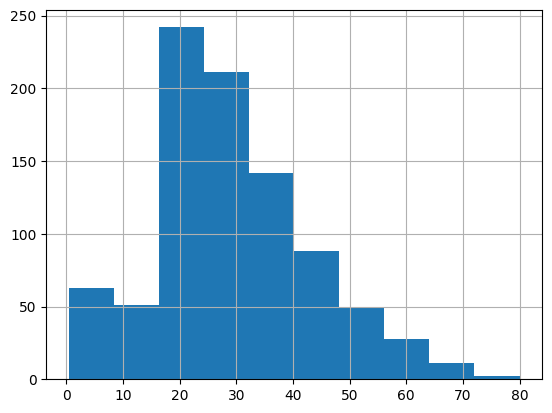

In [188]:
#histogram of Age
T.Age.hist()

<Axes: >

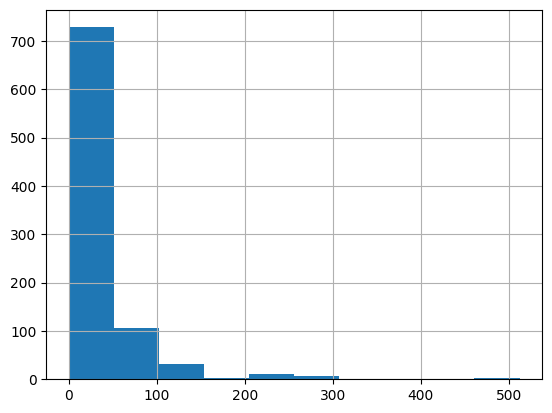

In [189]:
#histogram of Fare
T.Fare.hist()

<Axes: >

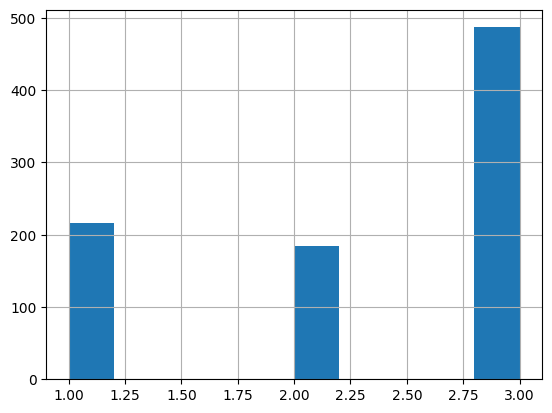

In [190]:
#histogram of Ticket class
T.Pclass.hist()

Finally, note that pandas has the command ```describe()``` which can be used to give some summary statistics for an input table of data. Use this command for the titanic table.

In [191]:
T.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920
